## Experiment 2A - Charge to Mass Ratio of an Electron
Determined by graphing recording values for $V$ and $I$ (at a constant $V_a$), and then using the equation:

$$ \frac{e}{m_e} = \frac{A}{m^2 V_a} \hspace{0.05cm} , \hspace{0.2cm} A = 4.493 \times 10^8 units $$



--- Linear Fit ---

m   =  0.000940 ± 0.000007 A/V
c   = -0.015    ± 0.001    A   



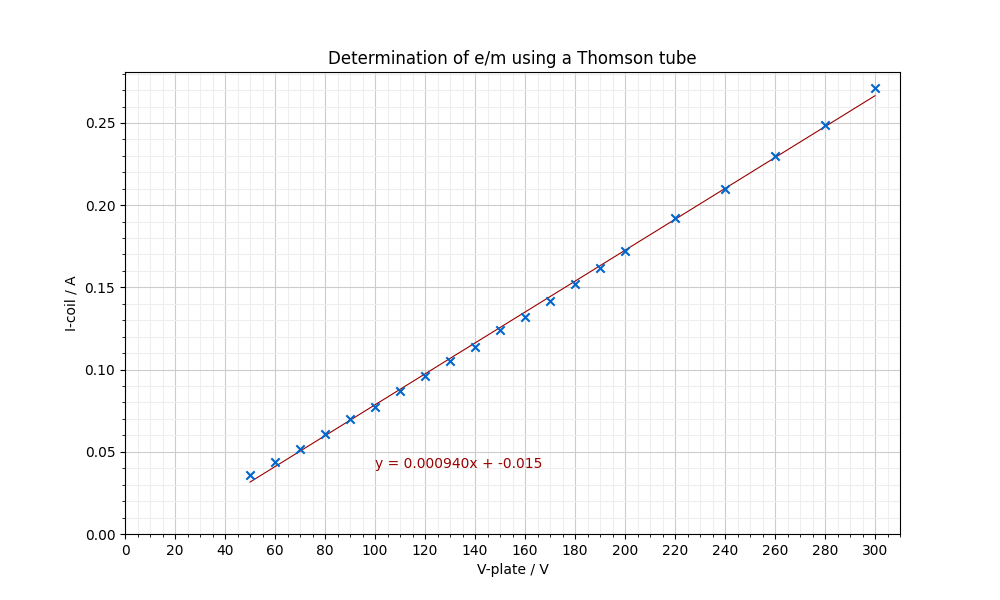

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# read data
x, y  = np.loadtxt("./2A-data.csv", delimiter=',', unpack=True)

# linear fit
line, errors = np.polyfit(x, y, 1, cov=True)
m, c = line
dm, dc = np.sqrt(np.diag(errors))
print(f'''
--- Linear Fit ---                  \n
m   =  {m:<8.6f} ± {dm:<8.6f} A/V
c   = { c:<9.3f} ± {dc:<8.3f} A     \n''')

# graph
x_max = max(x) + 10
y_max = max(y) + 0.01

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='x', color='#06c', zorder=3)
plt.plot(x, m*x + c, color='#900', linewidth=0.8, zorder=2)
plt.xlabel("V-plate / V")
plt.ylabel("I-coil / A")
plt.title("Determination of e/m using a Thomson tube")

plt.xlim([0, x_max])
plt.ylim([0, y_max])

plt.minorticks_on()
plt.xticks(np.arange(0, x_max, 20))
plt.yticks(np.arange(0, y_max, 0.05))
plt.grid(which='major', axis='both', color='#ccc', zorder=1)
plt.grid(which='minor', axis='both', color='#eee', zorder=1)

plt.annotate(f"y = {m:.6f}x + {c:.3f}", xy=(100, 0.04), color='#900')
plt.savefig("2A-graph.png", dpi=300)

### Analysis

##### Error propagation


$\Delta e/m_e = \sqrt{\left(\frac{\partial e/m_e}{\partial m} \Delta m\right)^2 + \left(\frac{\partial e/m_e}{\partial V_a} \Delta V_a\right)^2}$

$\Delta e/m_e = \sqrt{\left(-\frac{2 A}{m^3 V_a} \Delta m\right)^2 + \left(-\frac{A}{m^2 V_a^2} \Delta V_a\right)^2}$

$\Delta e/m_e = \frac{A}{m^2 V_a} \sqrt{\left(2 \frac{\Delta m}{m}\right)^2 + \left(\frac{\Delta V_a}{V_a}\right)^2}$

$\Delta e/m_e = \frac{e}{m_e} \sqrt{\left(2 \frac{\Delta m}{m}\right)^2 + \left(\frac{\Delta V_a}{V_a}\right)^2}$

In [17]:
Va  = 3.14e+3   # accelerating voltage
dVa = 0.01e+3   # uncertainty (digital instrument)
A   = 4.493e+8  # constant

em  = A / (m**2 * Va)
dem = em * np.sqrt( (2*dm/m)**2 + (dVa/Va)**2 )

print(f'''
--- Result ---                                          \n
e/m = ({em/10**11:.2f} ± {dem/10**11:.2f}) e+11 A/kg    \n''')


--- Result ---                                          

e/m = (1.62 ± 0.02) e+11 A/kg    

